# Newton's Method

## Problem 1: Univariate Newton's Method

In [1]:
import numpy as np
from scipy import optimize

In [2]:
def newton(f, x0, fp, tol = 10**(-5), maxiters = 15):
    for k in range(maxiters):
        x1 = x0 - f(x0) / fp(x0)
        if abs(x1 - x0) < tol:
            break
        x0 = x1
    return x1

In [3]:
f = lambda x: np.exp(x) - 2
fp = lambda x: np.exp(x)
print("SciPy solver solution: " + str(optimize.newton(f,0)))
print("My solver solution: " + str(newton(f, 0, fp)))

SciPy solver solution: 0.6931471805599592
My solver solution: 0.6931471805600254


In [4]:
g = lambda x: x**4 - 3
gp = lambda x: 4*x**3
print("SciPy solver solution: " + str(optimize.newton(g,1)))
print("My solver solution: " + str(newton(g, 1, gp)))

SciPy solver solution: 1.3160740129524924
My solver solution: 1.3160740129543826


## Problem 3: Backtracking

In [5]:
def newtonback(f, x0, fp, tol = 10**(-5), maxiters = 15, alpha = 1):
    for k in range(maxiters):
        x1 = x0 - alpha * f(x0) / fp(x0)
        if abs(x1 - x0) < tol:
            break
        x0 = x1
    return x1

In [6]:
f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
fp = lambda x: np.power(np.abs(x), -2./3) / 3

newtonback(f,0.01,fp,alpha = 0.4)

6.400000000000125e-07

## Problem 4: Optimal Alpha

In [7]:
def numiter(f, x0, fp, alpha = 1, tol = 10**(-5), maxiters = 15):
    num = maxiters  
    for k in range(maxiters):
        x1 = x0 - alpha * f(x0) / fp(x0)
        if abs(x1 - x0) < tol:
            num = k + 1
            break
        x0 = x1
    return num

In [8]:
import matplotlib.pyplot as plt

alpha = np.linspace(0.01,1,100)
num = lambda a: numiter(f, 0.01, fp, a)
numiters = np.array([num(a) for a in alpha])

plt.plot(alpha, numiters)
plt.xlabel("alpha")
plt.ylabel("Number of Iterations")
plt.show()

print("The optimal alpha is " + str(alpha[np.argmin(numiters)]))

<Figure size 640x480 with 1 Axes>

The optimal alpha is 0.33


## Problem 7: Basins of Attraction

In [9]:
def basin(f,Df,zeros,bounds,res,iters):
    rmin, rmax, imin, imax = bounds
    x_real = np.linspace(rmin, rmax, res)
    x_imag = np.linspace(imin, imax, res)
    X_real, X_imag = np.meshgrid(x_real, x_imag)
    X_0 = X_real + 1j*X_imag
    for i in range(iters):
        X_1 = X_0 - f(X_0)/Df(X_0)
        X_0 = X_1
    Y = []
    for x in X_0.flatten():
        dist = (zeros - x)**2        
        Y.append(np.argmin(dist))
    Y = np.array(Y)
    Y = np.reshape(Y, (res,res))
    plt.pcolormesh(X_real, X_imag, Y, cmap="brg")   

In [10]:
bounds = [-1.5, 1.5, -1.5, 1.5]
res = 300
iters = 30

### Test Using $f(x)=x^3-1$

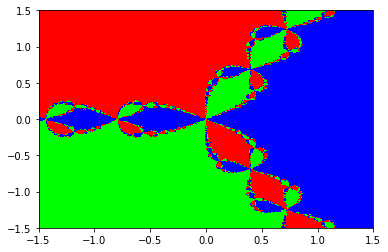

In [11]:
f = lambda x: np.power(x, 3) - 1
Df = lambda x: 3 * np.power(x, 2)
zeros = np.array([1, -1/2 + np.sqrt(3)/2j, -1/2 - np.sqrt(3)/2j])
basin(f,Df,zeros,bounds,res,iters)

### Test Using $f(x) = x^3 - x$

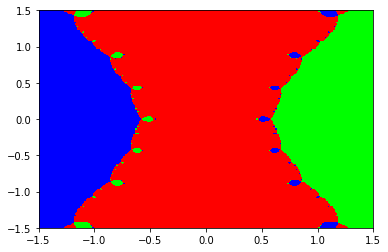

In [12]:
f = lambda x: np.power(x, 3) - x
Df = lambda x: 3 * np.power(x, 2) - 1
zeros = np.array([-1,0,1])
basin(f,Df,zeros,bounds,res,iters)